In [1]:
import os
os.chdir('../')

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

from scvi.dataset import CortexDataset

from scvi.metrics.differential_expression import most_expressed_genes

from scvi.models import VAE

In [2]:
gene_dataset = CortexDataset()

File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data


In [3]:
n_epochs=500
lr=1e-3
use_batches=False
use_cuda=True
example_indices = np.random.permutation(len(gene_dataset))
tt_split = int(0.9 * len(gene_dataset))
data_loader_train = DataLoader(gene_dataset, batch_size=128, pin_memory=use_cuda,
                               sampler=SubsetRandomSampler(example_indices[:tt_split]),
                               collate_fn=gene_dataset.collate_fn)
data_loader_test = DataLoader(gene_dataset, batch_size=128, pin_memory=use_cuda,
                              sampler=SubsetRandomSampler(example_indices[tt_split:]),
                              collate_fn=gene_dataset.collate_fn)
vae = VAE(gene_dataset.nb_genes, n_batch=gene_dataset.n_batches * use_batches, n_labels=gene_dataset.n_labels,
          use_cuda=use_cuda)

## Visualize differential expression 

In [5]:
gene_names, expression = most_expressed_genes(vae, data_loader_train)

Text(0,0.5,'Most Expressed Genes')

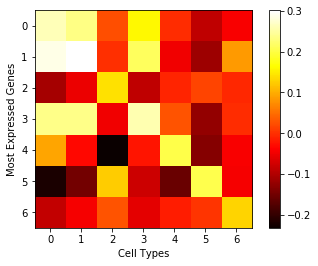

In [10]:
plt.imshow(expression, cmap='hot')
plt.colorbar()
plt.xlabel('Cell Types')
plt.ylabel('Most Expressed Genes')